In [182]:
# import dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [183]:
# read csv
df = pd.read_csv('crypto_data.csv')

### Data Preparation

In [184]:
# drop rows with nulls
df1 = df.dropna(axis=0, how='any')

# select only rows where IsTrading
df1 = df1.loc[df1.IsTrading]

# select only rows where TotalCoinsMined > 0
df1 = df1[df1['TotalCoinsMined']>0]

# drop unnecessary columns
df1 = df1.drop(['Unnamed: 0', 'IsTrading', 'CoinName'], axis=1)

# reset index
df2 = df1.reset_index(drop=True)

# convert to numerical data
df2['TotalCoinSupply'] = df2['TotalCoinSupply'].astype(float)
df2 = pd.get_dummies(df2)

# standardize data
# df_scaled = pd.DataFrame(scaler.fit_transform(df2))
# df_scaled.columns = df2.columns
df_scaled = df2
df_scaled.loc[:,["TotalCoinsMined", "TotalCoinSupply"]] = scaler.fit_transform(df_scaled.loc[:,["TotalCoinsMined", "TotalCoinSupply"]])

In [185]:
df_scaled

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.093970,-0.145009,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.524946,4.489424,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,-0.116715,-0.152560,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.114747,-0.152870,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,-0.073251,-0.123317,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,-0.116781,-0.149176,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
529,-0.095613,-0.132179,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
530,-0.116948,-0.152560,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Examine the number of rows and columns of your dataset now. How did they change?
Rows that didn't meet criteria were filtered out and each unique Algorithm and ProofType created a new column

### Dimensionality Reduction

In [186]:
# PCA
pca = PCA(n_components=0.9)
crypto_pca = pca.fit_transform(df_scaled)
df_crypto_pca = pd.DataFrame(data=crypto_pca)
df_crypto_pca

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.209276,-0.801765,0.172975,-0.672385,-0.028027,-0.027350,0.002161,-0.016859,-0.047423,-0.023043,-0.007850,0.015789
1,-0.187390,-0.804259,0.162555,-0.673029,-0.028782,-0.027213,0.002265,-0.017852,-0.047565,-0.023081,-0.007752,0.015888
2,3.529674,-0.305537,2.915403,0.414815,-0.163323,-0.259278,-0.278472,-0.152434,0.747395,0.360814,-0.233801,-0.070220
3,-0.180157,0.694290,-0.165771,0.239931,-0.278380,-0.614707,0.624124,-0.015063,0.027769,0.009259,-0.026164,-0.026461
4,-0.173289,0.688569,-0.154390,0.131918,-0.212548,-0.104388,-0.242103,0.002800,0.113068,-0.125626,0.058157,-0.129333
...,...,...,...,...,...,...,...,...,...,...,...,...
527,-0.108902,-0.046517,-0.116900,0.467190,0.034621,-0.668186,0.576375,0.831228,-0.120427,0.240369,-0.164298,-0.063213
528,-0.206436,-0.801391,0.175309,-0.672233,-0.027869,-0.027316,0.002264,-0.016786,-0.047284,-0.023163,-0.007821,0.015774
529,-0.124589,0.736198,-0.090418,0.144735,-0.240199,-0.126672,-0.350559,-0.273663,-0.698662,0.430965,-0.085360,0.070798
530,-0.174924,0.695669,-0.155193,0.136888,-0.215873,-0.111529,-0.271995,0.058355,0.169750,-0.213838,0.121578,0.832969


For this project, preserve 90% of the explained variance in dimensionality reduction. How did the number of the features change?

Number of features decreased from 98 to 12 principal features that account for 90% of the variance.

In [187]:
# t-SNE
tsne = TSNE(learning_rate=200)
tsne_features = tsne.fit_transform(df_crypto_pca)
tsne_features.shape

(532, 2)

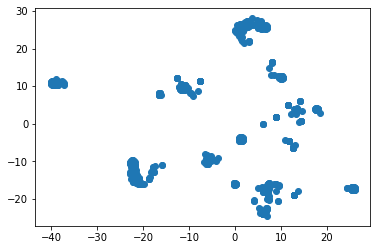

In [188]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

Observe whether there are distinct clusters or not.

While clustering does occur, there appear to be many clusters and it may be difficult to distinguish some.

### Cluster Analysis with k-Means

In [189]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)
    
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

C:\Users\iamth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,1691.965348
1,2,1007.765071
2,3,794.753156
3,4,602.031812
4,5,489.084850
5,6,394.223846
6,7,342.385486
7,8,287.526574
8,9,264.648914
9,10,236.893924


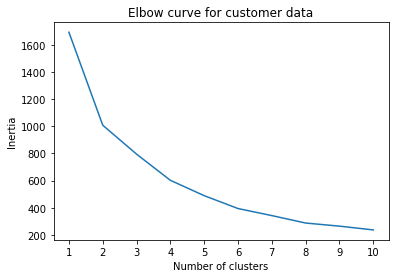

In [190]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

Determine, if possible, where the elbow of the plot is, and at which value of `k` it appears.

The elbow appears at k=8 as the inertia seems to becomes linear at values beyond 8.

Based on the above analysis of cryptocurrencies, many cryptocurrencies can be clustered into approximately 8 clusters as examined by the k-Means method. However, some cryptocurrencies may not fall into distinct clusters as seen by the results of the t-SNE plot.